In [28]:
from qiskit import QuantumCircuit, Aer, transpile, execute
from qiskit.circuit import Parameter
import numpy as np

import matplotlib.pyplot as plt

theta = Parameter('θ')
qc = QuantumCircuit(1, 1)  # Add 1 classical bit for measurement

# Apply gates as per the specification
qc.h(0)

qc.p(0.5*theta, 0)

qc.h(0)

qc.measure(0, 0)

# qc.rx(np.pi/2, 0)
# # qc.rz(-2 * theta, 0)  # Time evolution under z-axis rotation Hamiltonian
# qc.p(0.5*theta, 0)
# qc.rz(np.pi/2, 0)
# qc.rx(np.pi/2, 0)

# Add a measurement


/var/folders/w1/ls_y8xbd21b7x0tbqwgfdcd00000gn/T/ipykernel_81505/686726498.py:18: RuntimeWarning: divide by zero encountered in divide
  fisher_information = np.sum(dprobs_dtheta**2 / np.array(probabilities), axis=1)


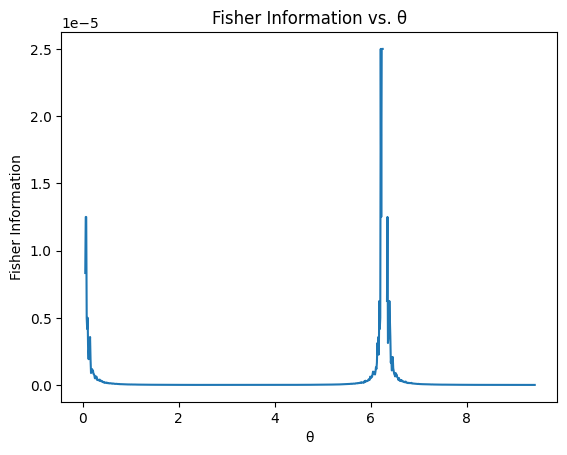

In [29]:
backend = Aer.get_backend('qasm_simulator')
# thetas = np.linspace(0, 2*np.pi, 100)  # Sample theta values
# thetas = np.arange(1e-3, 2*np.pi + 1e-3, 1e-3)  # Sample theta values
thetas = np.arange(1e-3, 3 * np.pi + 1e-3, 1e-2)  # Sample theta values
probabilities = []

for val in thetas:
    t_qc = transpile(qc.bind_parameters({theta: val}), backend)
    counts = execute(t_qc, backend, shots=10000).result().get_counts(t_qc)
    
    # Ensure both probabilities are available
    prob_0 = counts.get('0', 0) / 10000
    prob_1 = counts.get('1', 0) / 10000
    
    probabilities.append((prob_0, prob_1))

dprobs_dtheta = np.gradient(probabilities, axis=0)[1]
fisher_information = np.sum(dprobs_dtheta**2 / np.array(probabilities), axis=1)


plt.plot(thetas, fisher_information)
plt.xlabel('θ')
plt.ylabel('Fisher Information')
plt.title('Fisher Information vs. θ')
plt.show()
